## E-news Express ABtesting

**Lets start by importing all the useful libraries.**

In [141]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

**Now loading the provided dataset.**

In [10]:
db=pd.read_csv('abtest.csv')

In [11]:
db

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


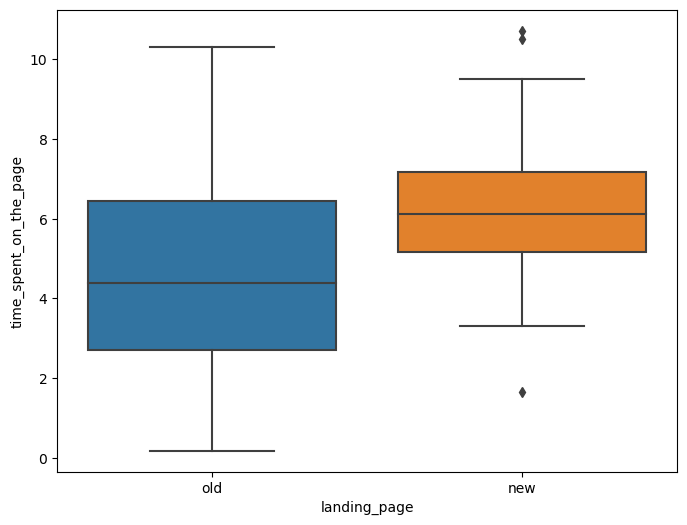

In [145]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = db)
plt.show()

In [146]:
db.groupby('landing_page')['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

**On extracting the mean of time spent on both old and new landing page, mean time spent on new landing page is higher,but since this only a sample of the population we cannot deduce the behaviour of the population from this data,hence we will use one hypotheses testing** 

**According to the objective statement, the goal is to try and challenge the null hypothesis i.e. time spent on new and old landing pages is the same, the challenge to this null hypthesis is one tailed and says that time spent on new is more than that on the old page**


In [ ]:
#lets take a look at the null and althernate hypothesis 
#Null hypothesis
# mean1=mean2
#Alternate hypothesis
#mean1>mean2(new>old)

**We will start with segregating two columns from the dataset which stores time spent on new and old landing page.Since, we cannot use one categorical value and one numerical as an argument in the respective test function.**

In [78]:
df1=db[db['landing_page'] == 'new'][[ 'time_spent_on_the_page']].reset_index()
df2=db[db['landing_page']=='old'][[ 'time_spent_on_the_page']].reset_index()

In [73]:
#Now importing ttest_ind from scipy.stats library as this is a one sided but two sample independent testing
from scipy.stats import ttest_ind

In [65]:
test_stat,p_value=ttest_ind(df1['time_spent_on_the_page'],df2['time_spent_on_the_page'],alternative='greater')
p_value

0.0001316123528095005

**Answer1. The P value is less than level of significnce i.e 0.005.Hence we can confidently reject the Null hypothesis and go with the alternate hypothesis which says that the time spent on the new landing page is more than that on the old page.**

**Now lets have a look at the conversion rates of both the pages. Since we have two samples here, two conversions(proportions)z test will be used to test the Null and alternate hypothesis.**

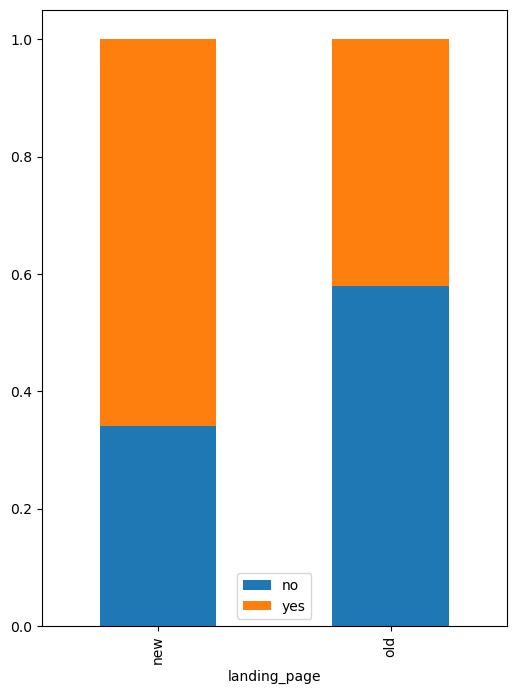

In [168]:
# complete the code to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(db['landing_page'],db['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

In [ ]:
#H0- P1=P2
#H1=P1>P2(conversion for new is greater than conversion for old landing page)

In [ ]:
#Creating two datasets with conversion column for new and old landing pages and filtering out the positive conversions for each

In [80]:
df3=db[db['landing_page'] == 'new'][[ 'converted']].reset_index()
df4=db[db['landing_page']=='old'][[ 'converted']].reset_index()

In [91]:
len(df3[df3['converted']=='yes'])

33

In [92]:
len(df4[df4['converted']=='yes'])

21

In [96]:
#assigning arguments for the proportions_ztest function
converted_count=np.array([33,21])
nobs=np.array([50,50])

In [89]:
from statsmodels.stats.proportion import proportions_ztest

In [97]:
test_stat,p_value=proportions_ztest(converted_count,nobs)
p_value

0.016052616408112556

**Answer2 -As the P value is less than 0.05, we can reject the Null hypthesis and say that the convertion rate on the new landing page is higher than the conversion rate of the old landing page.**

In [98]:
db

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


**In order to identify the hypothesis of dependence, we should use chi2 testing as we are dealing with two categorical variables here and trying to if there is a relationship**

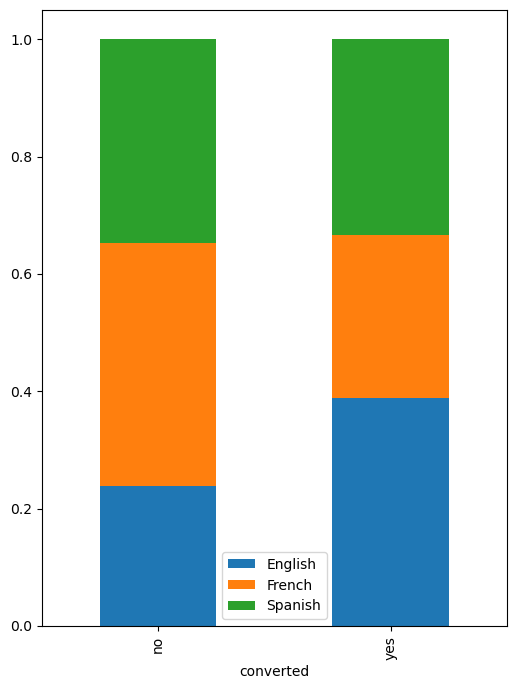

In [143]:
# complete the code to visually plot the dependency between conversion status and preferred langauge
pd.crosstab(db['converted'],db['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

In [ ]:
#Null hyptothesis = There is no dependency between conversions and the language preferred
#Alternate hypothesis= There is a dependency between conversions and the language preferred

In [137]:
#Lets start by creating a new database called df5 and in this database, we can add the two coloumns that we are testing i.e. converted and language preferred.
df5=pd.DataFrame

In [120]:
df5= db.loc[:,['converted','language_preferred']]
df5

,converted,language_preferred
0,no,Spanish
1,yes,English
2,no,Spanish
3,no,French
4,yes,Spanish
...,...,...
95,no,Spanish
96,yes,English
97,yes,Spanish
98,yes,Spanish


In [113]:
#Importing chi2_contingency function from stats library
from scipy.stats import chi2_contingency

In [134]:
#Using crosstab function in pandas in order to create a contingency table with the data in our two above columns. 
contingency_table = pd.crosstab(df5['converted'], df5['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [136]:
#Lets now use the chi2_contigency function to find out the p_value of the data
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
p_value

0.21298887487543447

**Answer3. Since the P value is greater than level of significance 0.05, hence we cannot reject the Null hypotheses. The conversions are not dependent on the language preferred as per our testing**

In [152]:
df_new = db[db['landing_page'] == 'new']

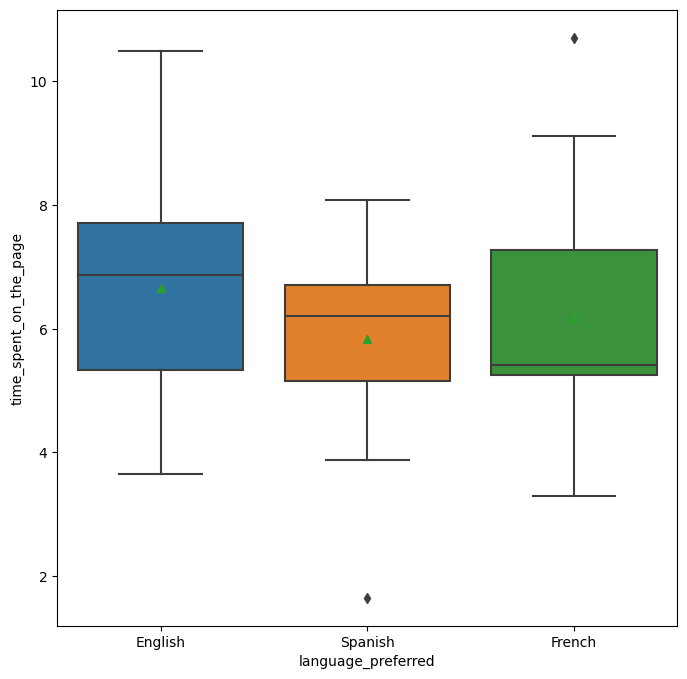

In [155]:
# complete the code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

In [156]:
#lets establish the null and alternate hypothesis now
#Null hypothesis= Mean time spent for each language on the new landing page is the same. M1=M2=M3
#Alternate hypothesis=Mean time spent for each language on the new landing page is different.Atleast one the means is not equal to the others.

In [159]:
#Now lets find the mean time spent on the new landing page across different languages using groupby function
df_new.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

**We will use ANOVA to in order to compare the 3 means. 
First, we start by calculating the time spent by different language users using the code below and then use f_oneway function from stats library to do the oneway comparision in all different means**

In [160]:
# create a subsetted data frame of the time spent on the new page by language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']   
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']  

In [164]:
from scipy.stats import f_oneway 

# write the code to calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   #complete the code by filling appropriate parameters in the blanks
p_value

0.43204138694325955

**Answer-4-Since the p_value is greater than the level of significance, we do not have sufficient evidence to reject the null hypothesis.The mean time spent on the new page is same for all the different language users**. 

In [167]:
#We can deduce the following observations from our analysis of the data above using various hypothesis testing
#1.Users spent more time on the new landing page as compared to the old landing page.
#2. The number of conversions on the new landing page are higher as compared to the old landing page.
#3. There is no dependency between the conversion status and the language preferrence.
#4. Mean time spent on the new landing page is same across all language users.